In [1]:
from sklearn.cluster import KMeans
import numpy as np
from scipy.stats import mode
from sklearn.datasets import load_digits
from sklearn.metrics import confusion_matrix
import seaborn as sns

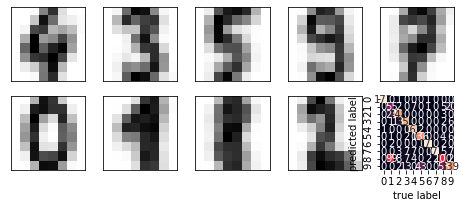

In [2]:
digits = load_digits()
digits.data.shape

kmeans = KMeans(n_clusters=10, random_state=0)
prediction = kmeans.fit_predict(digits.data)
prediction

kmeans.cluster_centers_.shape

# Scatter plot of the data points
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
  axi.set(xticks=[], yticks=[])
  axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

labels = np.zeros_like(prediction)
for i in range(10):
  mask = (prediction == i)
  labels[mask] = mode(digits.target[mask])[0]

from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

mat = confusion_matrix(digits.target, labels)

ax = sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=digits.target_names, yticklabels=digits.target_names)
ax.set_ylim(10.0,0)

plt.xlabel('true label')
plt.ylabel('predicted label');